In [1]:
import os
from roboflow import Roboflow
from IPython import display
import ultralytics
import glob

# Check image displays are good
display.clear_output()
# Check ultralytics library is good
ultralytics.checks()

# Setup HOME environment variable
HOME = os.getcwd()
print(HOME)

Ultralytics YOLOv8.0.227 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (NVIDIA GeForce RTX 3080, 10240MiB)
Setup complete ✅ (12 CPUs, 7.7 GB RAM, 68.4/1006.9 GB disk)
/home/mreag/repos/DBD-Killer-AI


## Import YOLO and the IPython image displays

In [2]:
from ultralytics import YOLO
from IPython.display import display, Image

## Inference with Pre-trained COCO Model

### 🐍 Python SDK

The simplest way of simply using YOLOv8 directly in a Python environment.

In [3]:
model = YOLO(f'{HOME}/yolov8n.pt')
# results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)
# Image(filename='runs/detect/predict/dog.jpeg', height=600)

In [4]:
# results[0].boxes.xyxy

In [5]:
# results[0].boxes.conf

In [6]:
# results[0].boxes.cls

## Roboflow Universe

Need data for your project? Before spending time on annotating, check out Roboflow Universe, a repository of more than 110,000 open-source datasets that you can use in your projects. You'll find datasets containing everything from annotated cracks in concrete to plant images with disease annotations.


[![Roboflow Universe](https://media.roboflow.com/notebooks/template/uni-banner-frame.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672878480290)](https://universe.roboflow.com/)



## Preparing a custom dataset

Building a custom dataset can be a painful process. It might take dozens or even hundreds of hours to collect images, label them, and export them in the proper format. Fortunately, Roboflow makes this process as straightforward and fast as possible. Let me show you how!

### Step 1: Creating project

Before you start, you need to create a Roboflow [account](https://app.roboflow.com/login). Once you do that, you can create a new project in the Roboflow [dashboard](https://app.roboflow.com/). Keep in mind to choose the right project type. In our case, Object Detection.

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/creating-project.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672929799852"
  >
</div>

### Step 2: Uploading images

Next, add the data to your newly created project. You can do it via API or through our [web interface](https://docs.roboflow.com/adding-data/object-detection).

If you drag and drop a directory with a dataset in a supported format, the Roboflow dashboard will automatically read the images and annotations together.

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/uploading-images.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672929808290"
  >
</div>

### Step 3: Labeling

If you only have images, you can label them in [Roboflow Annotate](https://docs.roboflow.com/annotate).

<div align="center">
  <img
    width="640"
    src="https://user-images.githubusercontent.com/26109316/210901980-04861efd-dfc0-4a01-9373-13a36b5e1df4.gif"
  >
</div>

### Step 4: Generate new dataset version

Now that we have our images and annotations added, we can Generate a Dataset Version. When Generating a Version, you may elect to add preprocessing and augmentations. This step is completely optional, however, it can allow you to significantly improve the robustness of your model.

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/generate-new-version.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1673003597834"
  >
</div>

### Step 5: Exporting dataset

Once the dataset version is generated, we have a hosted dataset we can load directly into our notebook for easy training. Click `Export` and select the `YOLO v5 PyTorch` dataset format.

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/export.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672943313709"
  >
</div>




## Dataset 1:

* Augmentations:
    * includes all Null
    * 

In [7]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

# Download dataset
rf = Roboflow(api_key="WhWSQgWoApS6vFxtQ2kk")
project = rf.workspace("deadbydaylightkillerai").project("killer_ai_object_detection")
dataset = project.version(3).download("yolov8")


mkdir: cannot create directory ‘/home/mreag/repos/DBD-Killer-AI/datasets’: File exists
/home/mreag/repos/DBD-Killer-AI/datasets
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.227, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Killer_AI_Object_Detection-3 in yolov8:: 100%|██████████| 3622/3622 [00:00<00:00, 11056.05it/s]


## Custom Training

In [12]:
dataset.location

'/home/mreag/repos/DBD-Killer-AI/datasets/Killer_AI_Object_Detection-3'

In [13]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=300 imgsz=800 plots=True workers=0

/home/mreag/repos/DBD-Killer-AI
New https://pypi.org/project/ultralytics/8.0.236 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.227 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (NVIDIA GeForce RTX 3080, 10240MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/home/mreag/repos/DBD-Killer-AI/datasets/Killer_AI_Object_Detection-3/data.yaml, epochs=300, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=0, project=None, name=train30, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=Fals

In [14]:
!ls {HOME}/runs/detect/train/

args.yaml  weights


/home/mreag/repos/DBD-Killer-AI


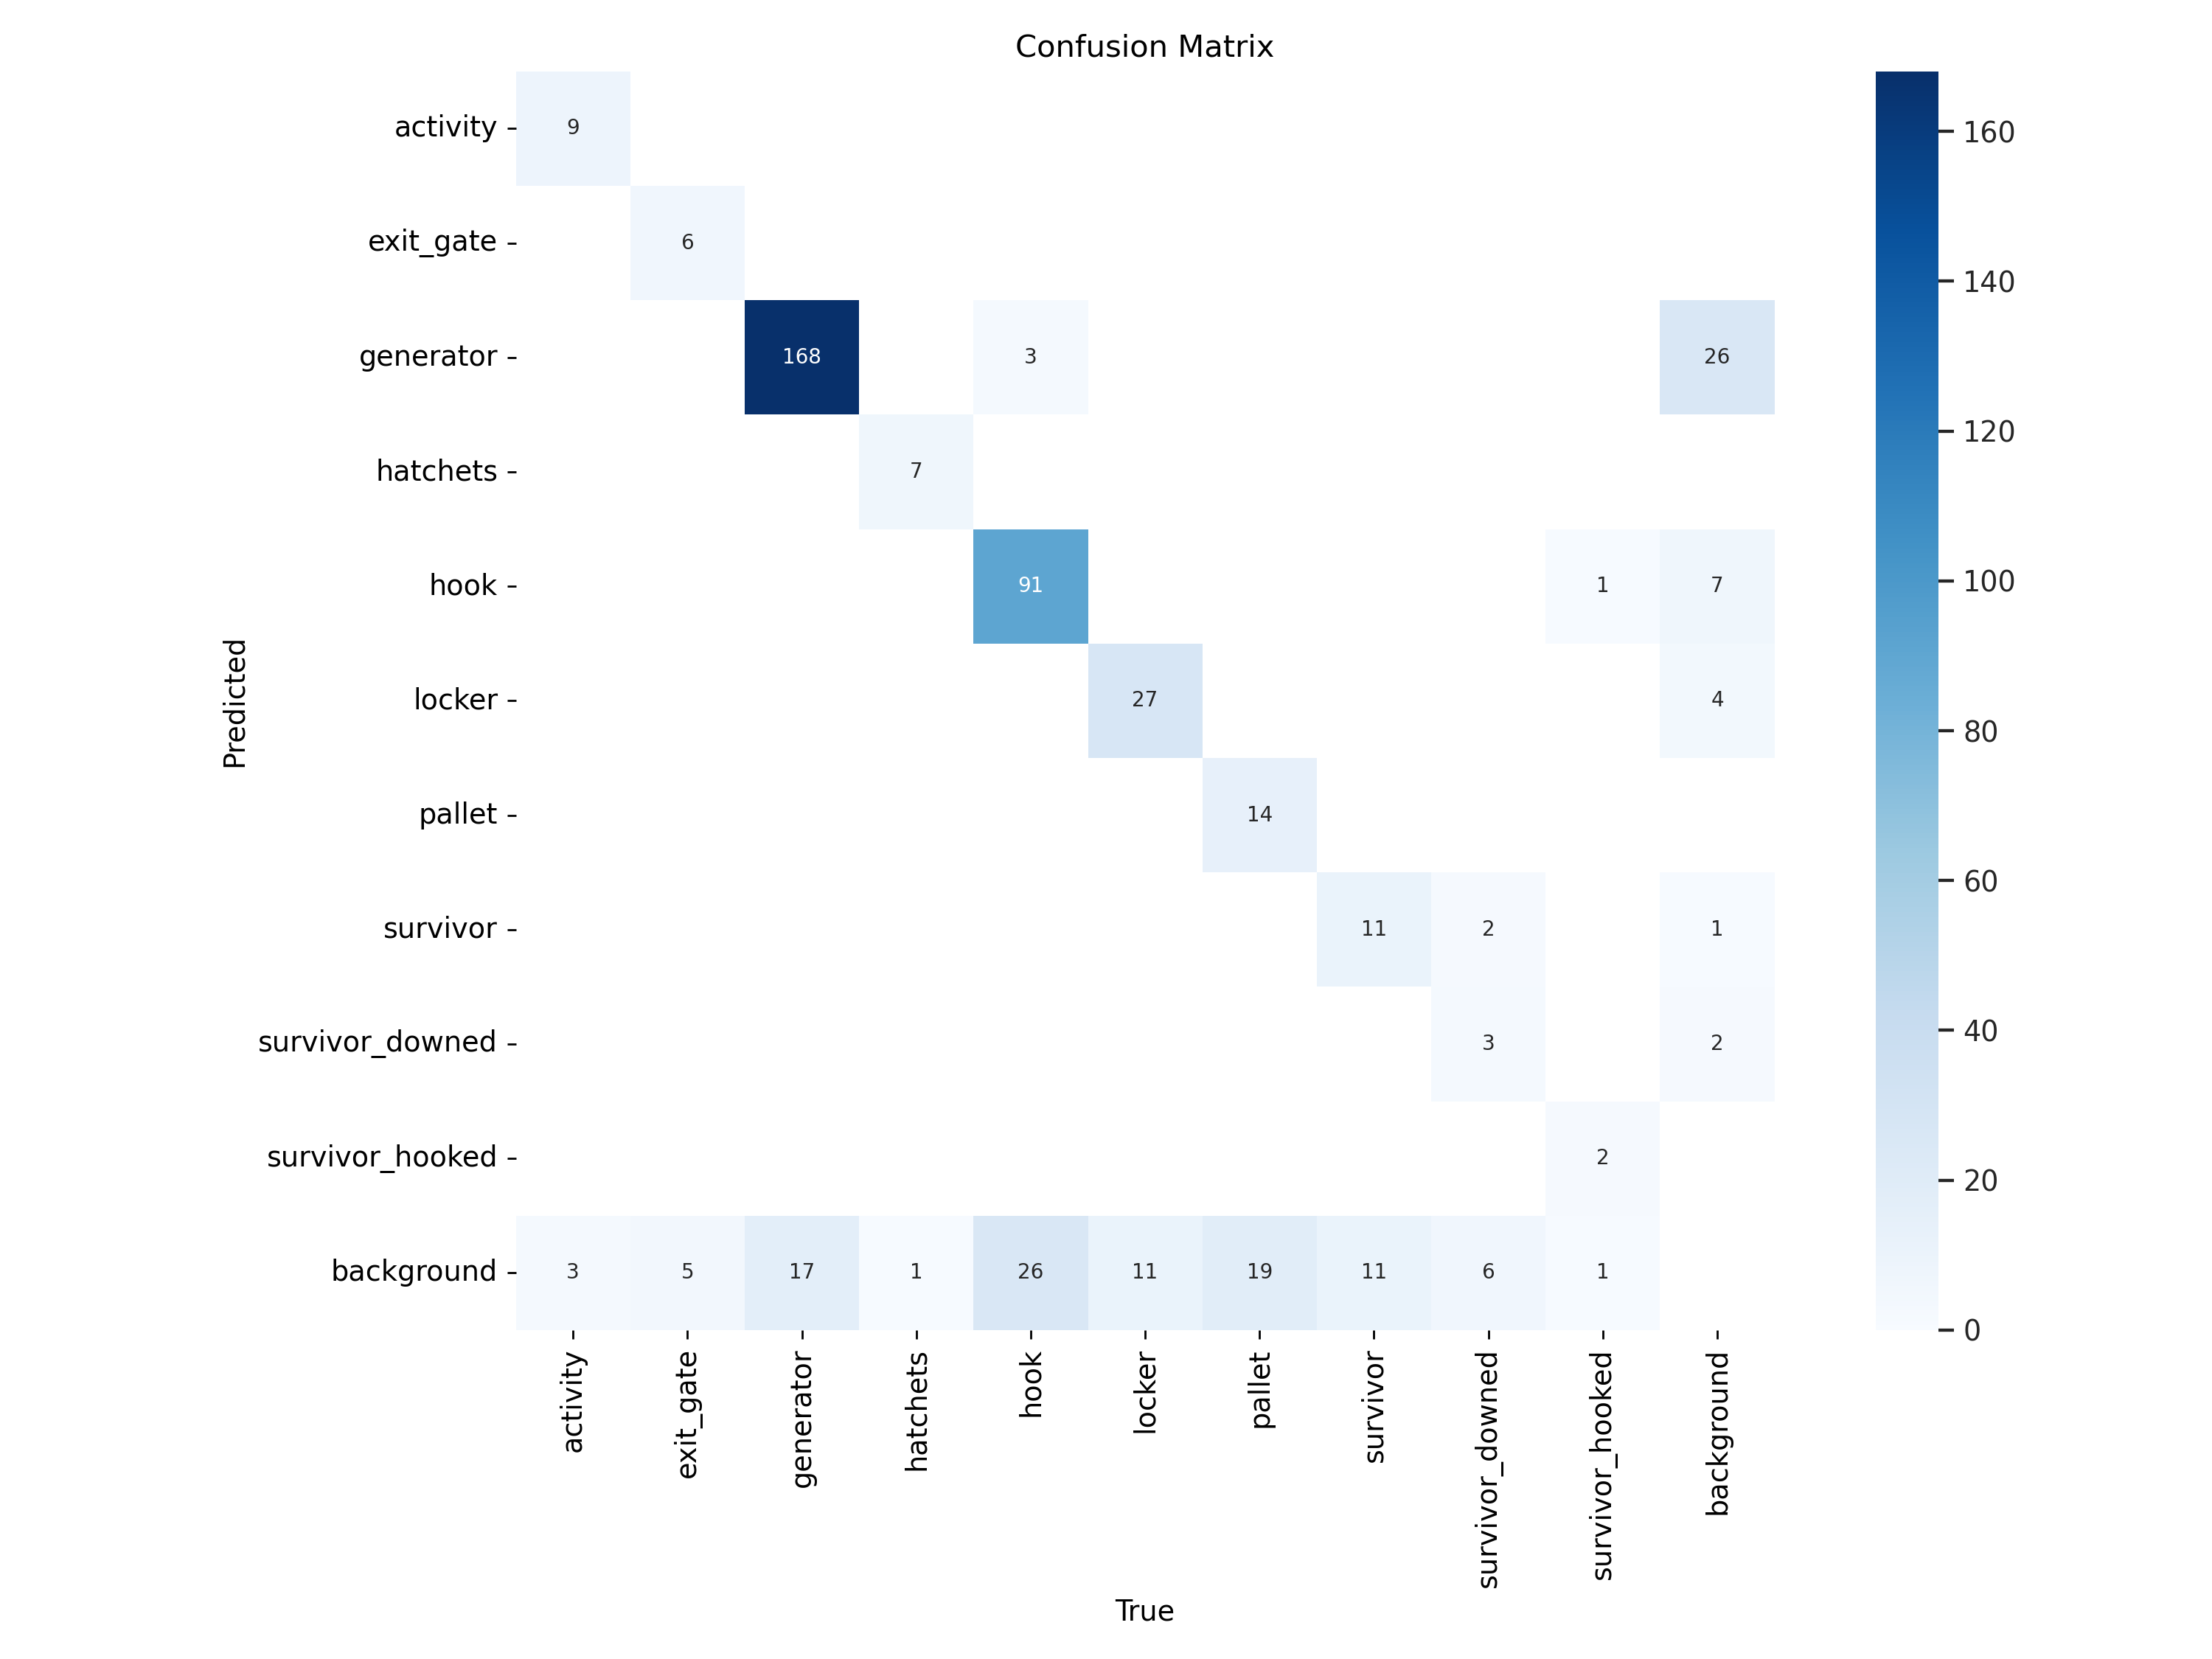

In [16]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train30/confusion_matrix.png', width=600)

/home/mreag/repos/DBD-Killer-AI


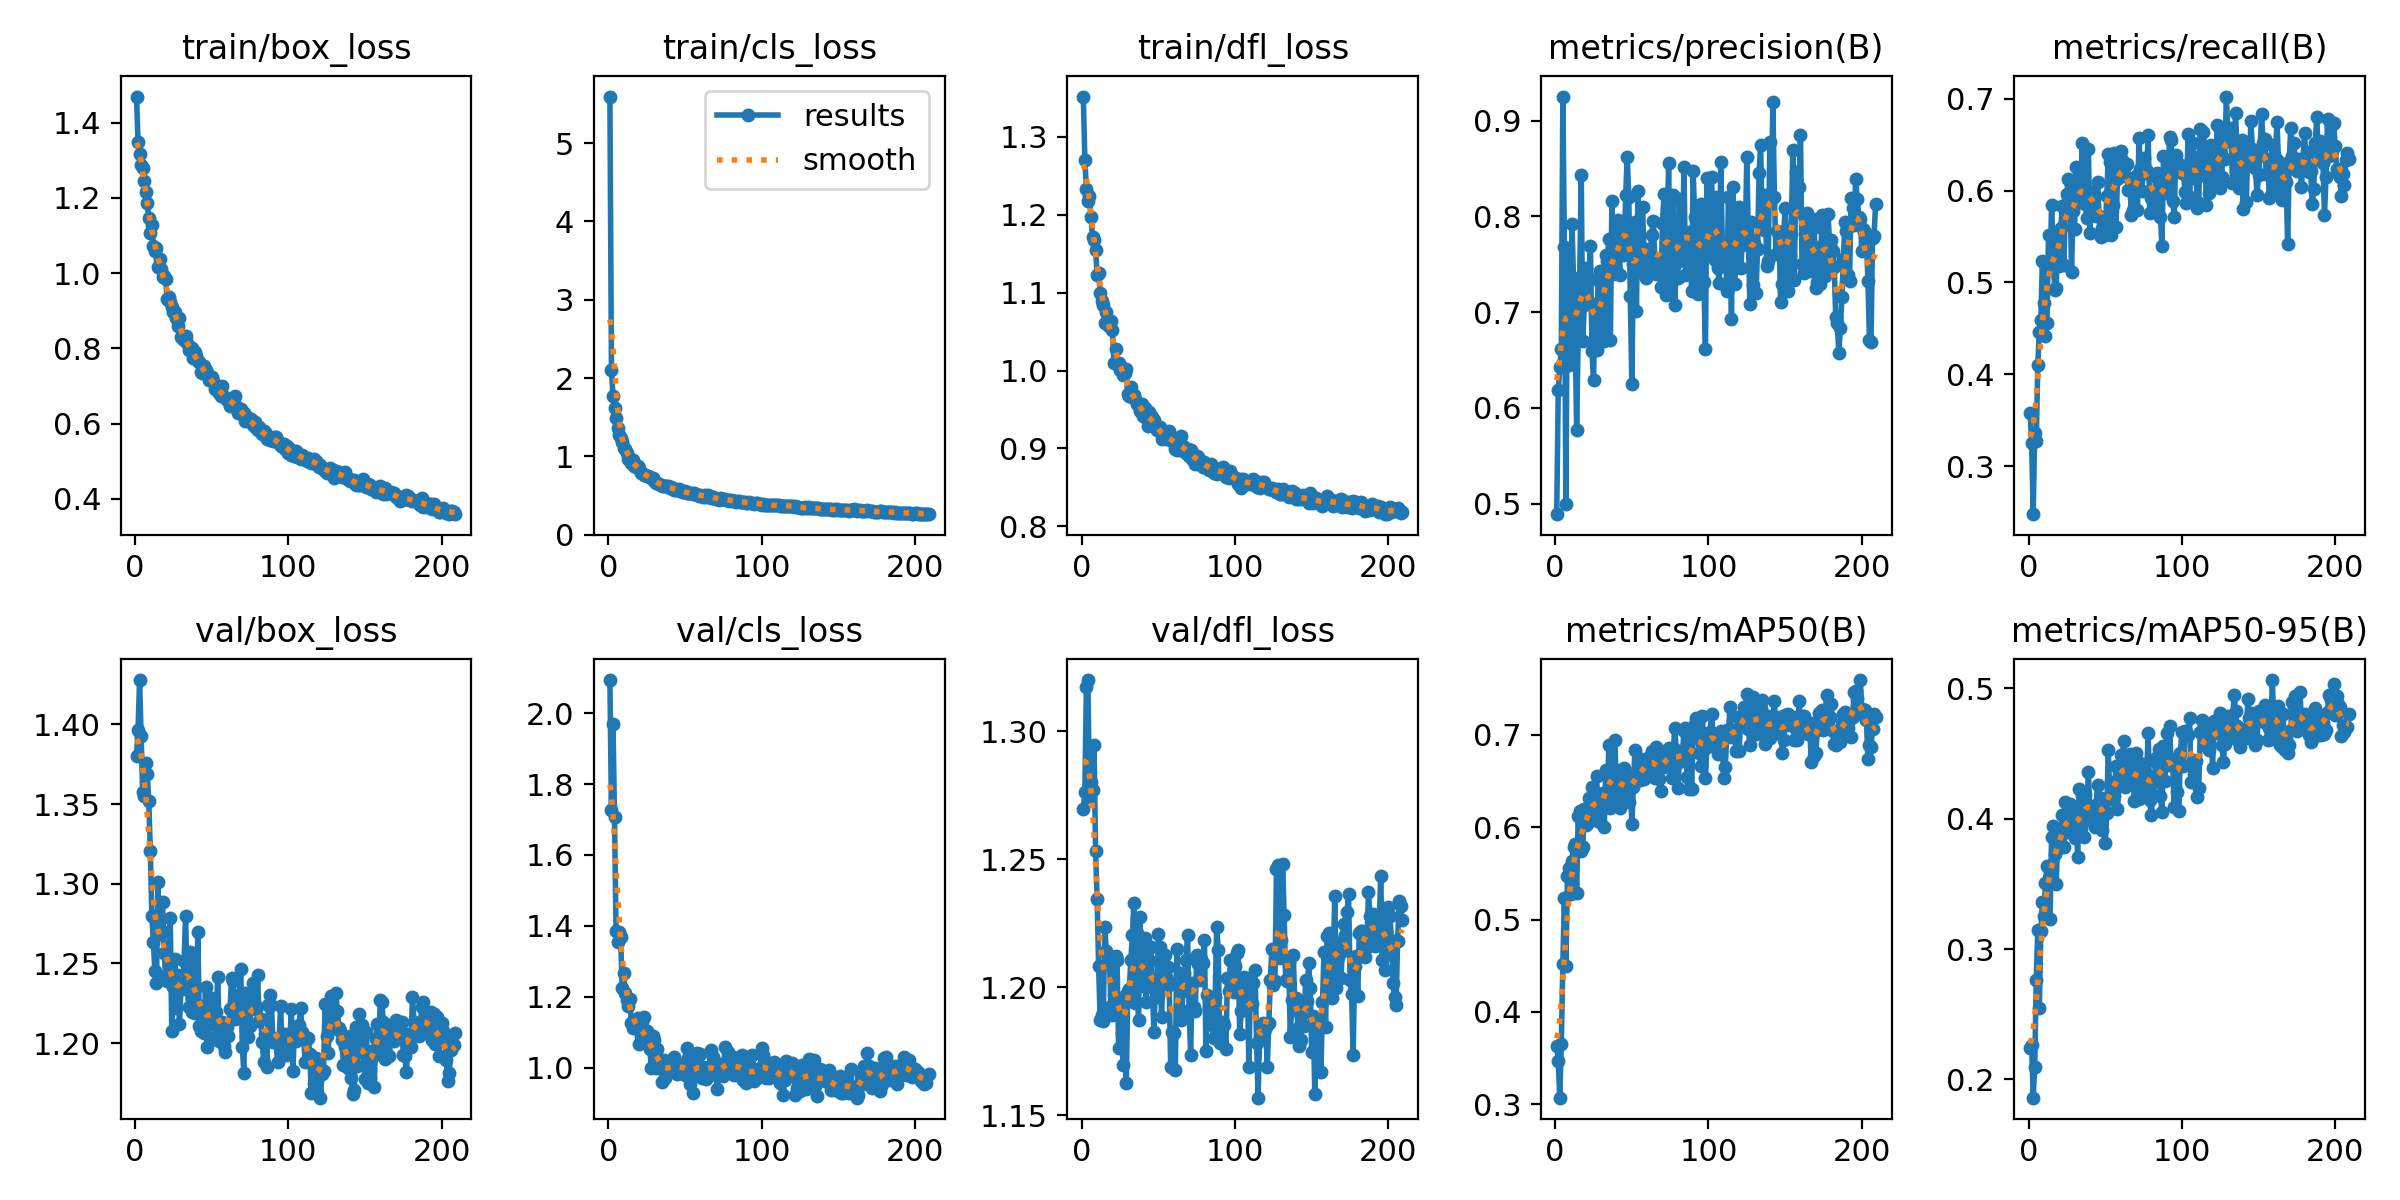

In [17]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train30/results.png', width=600)

/home/mreag/repos/DBD-Killer-AI


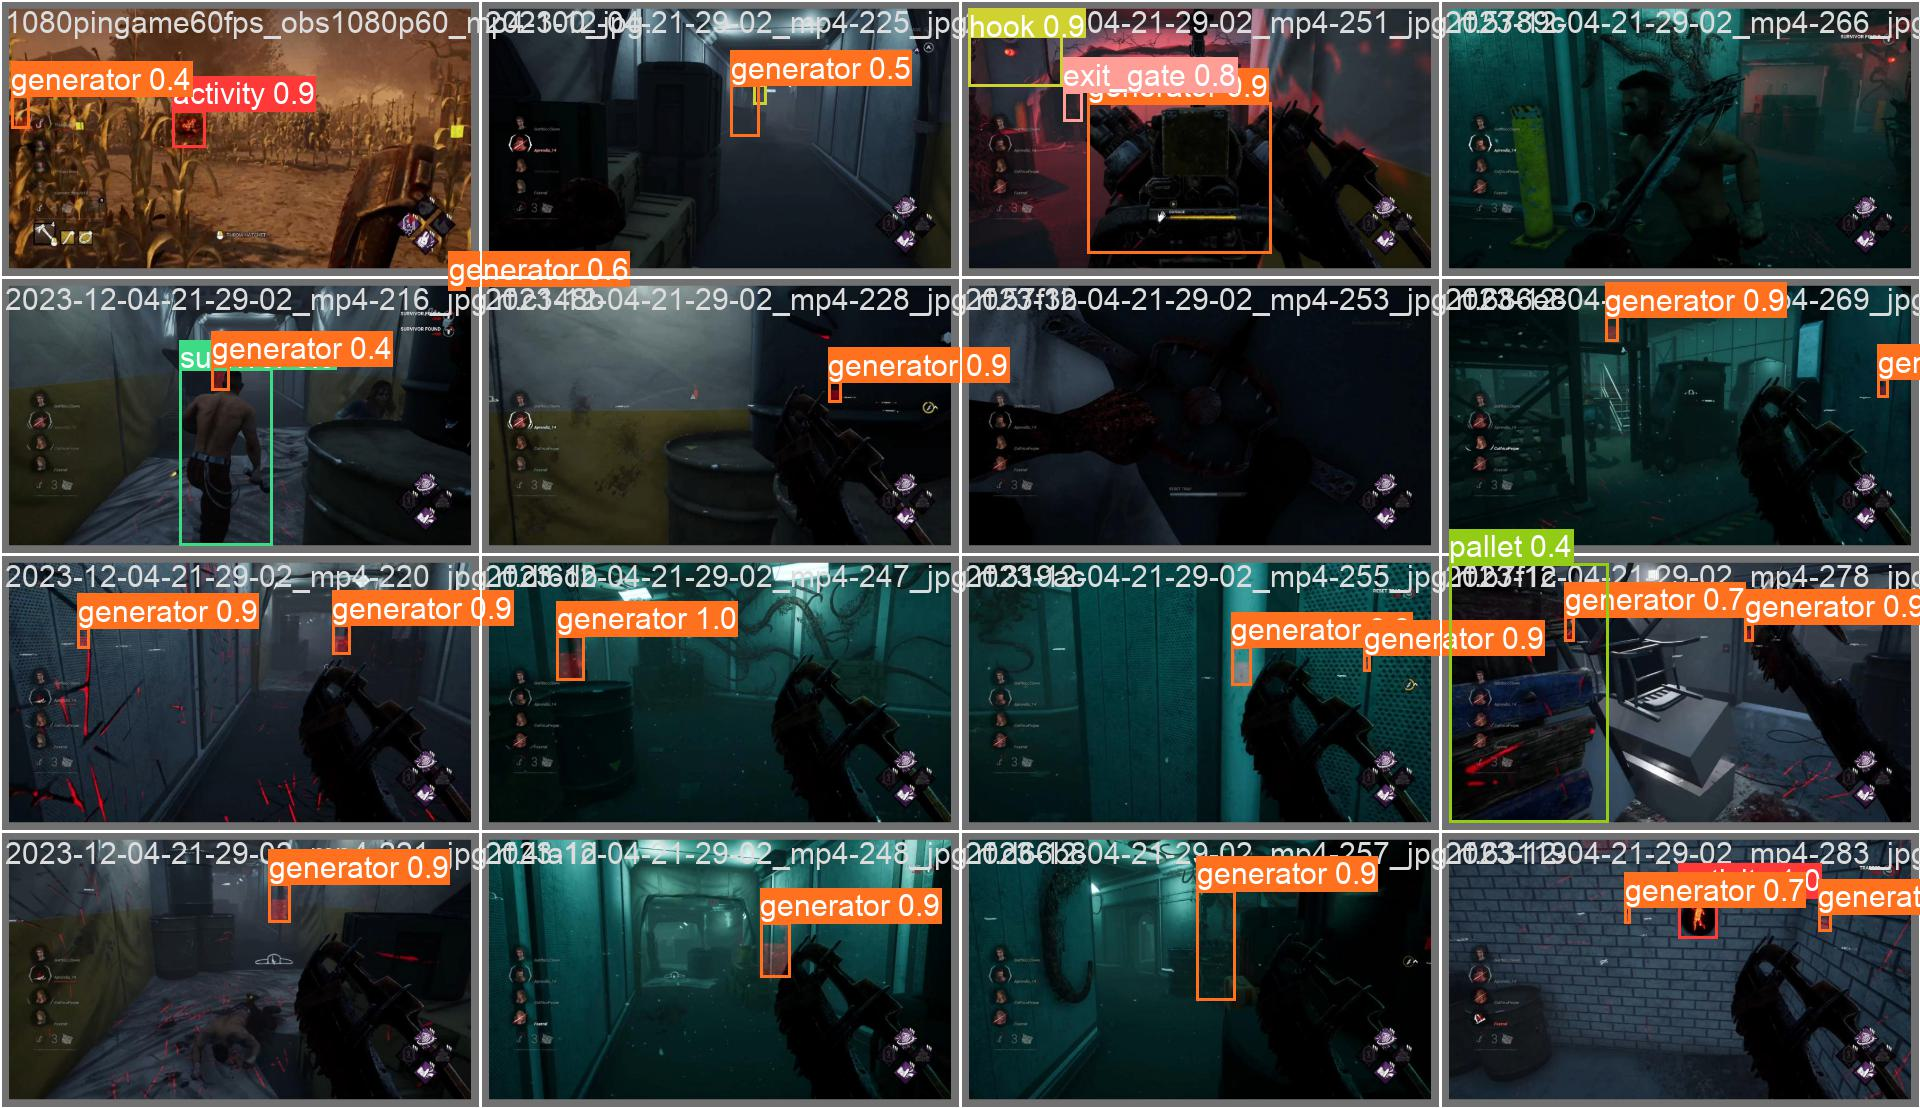

In [21]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train30/val_batch0_pred.jpg', width=1200)

## Validate Custom Model

In [22]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train30/weights/best.pt data={dataset.location}/data.yaml

/home/mreag/repos/DBD-Killer-AI
Ultralytics YOLOv8.0.227 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (NVIDIA GeForce RTX 3080, 10240MiB)
Model summary (fused): 168 layers, 11129454 parameters, 0 gradients
val: Scanning /home/mreag/repos/DBD-Killer-AI/datasets/Killer_AI_Object_Detectio
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        238        444      0.831      0.649      0.737      0.507
              activity        238         12      0.763       0.75      0.772      0.502
             exit_gate        238         11      0.896      0.545      0.596      0.321
             generator        238        185      0.818      0.908      0.904      0.653
              hatchets        238          8       0.91      0.875      0.955      0.732
                  hook        238        120      0.901      0.755      0.825       0.57
                locker        238         38       0.85      0.711      0.782      0.496
                pa

## Inference with Custom Model

In [23]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train30/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/home/mreag/repos/DBD-Killer-AI
Ultralytics YOLOv8.0.227 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (NVIDIA GeForce RTX 3080, 10240MiB)
Model summary (fused): 168 layers, 11129454 parameters, 0 gradients

image 1/119 /home/mreag/repos/DBD-Killer-AI/datasets/Killer_AI_Object_Detection-3/test/images/1080pingame60fps_obs1080p60_mp4-0_jpg.rf.1d9e50ab2a5f784fe73d107a80c95e7a.jpg: 480x800 1 generator, 1 pallet, 95.2ms
image 2/119 /home/mreag/repos/DBD-Killer-AI/datasets/Killer_AI_Object_Detection-3/test/images/1080pingame60fps_obs1080p60_mp4-109_jpg.rf.33932ac9e179e2b17e1dafe63f0d8c0f.jpg: 480x800 (no detections), 7.3ms
image 3/119 /home/mreag/repos/DBD-Killer-AI/datasets/Killer_AI_Object_Detection-3/test/images/1080pingame60fps_obs1080p60_mp4-110_jpg.rf.d495e2ada9b92d355bc8df3afb81ac5e.jpg: 480x800 1 survivor, 6.9ms
image 4/119 /home/mreag/repos/DBD-Killer-AI/datasets/Killer_AI_Object_Detection-3/test/images/1080pingame60fps_obs1080p60_mp4-113_jpg.rf.7fcccf4ff134d2e1e6423ddb6a0104e4.jpg: 480x800 (

**NOTE:** Let's take a look at few results.

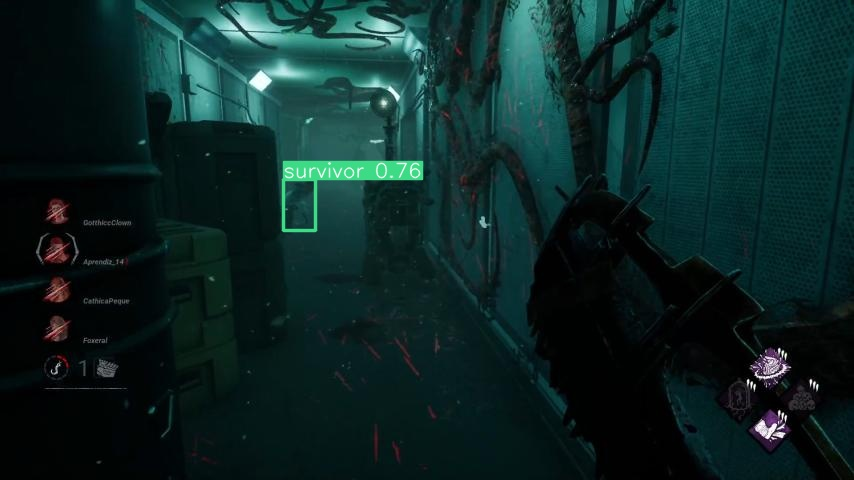

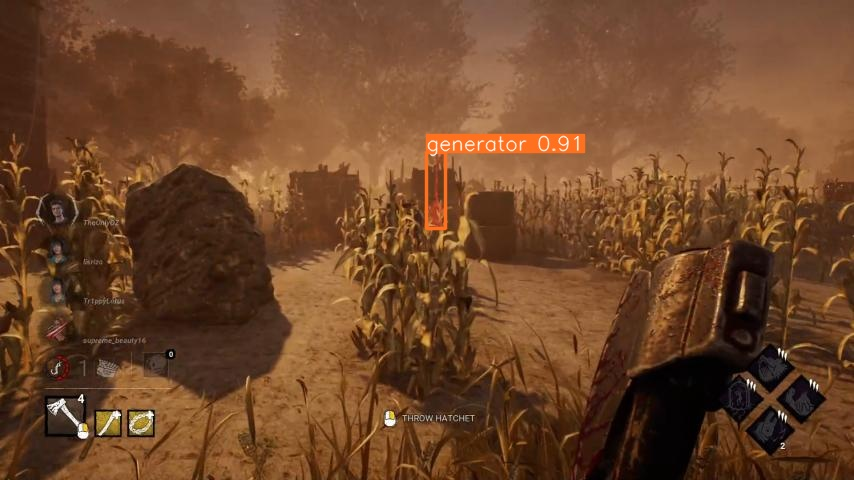

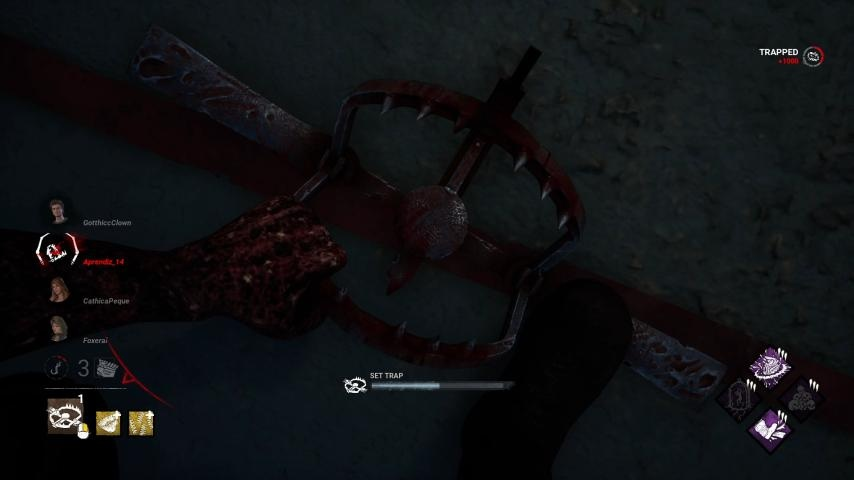

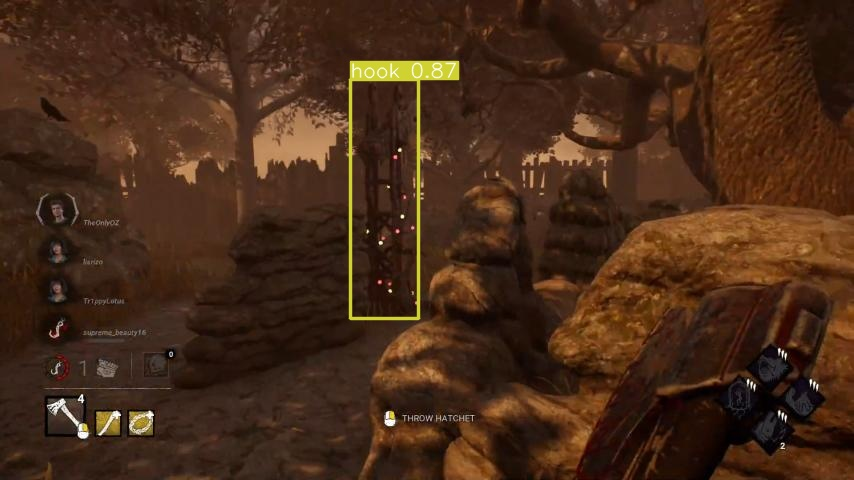

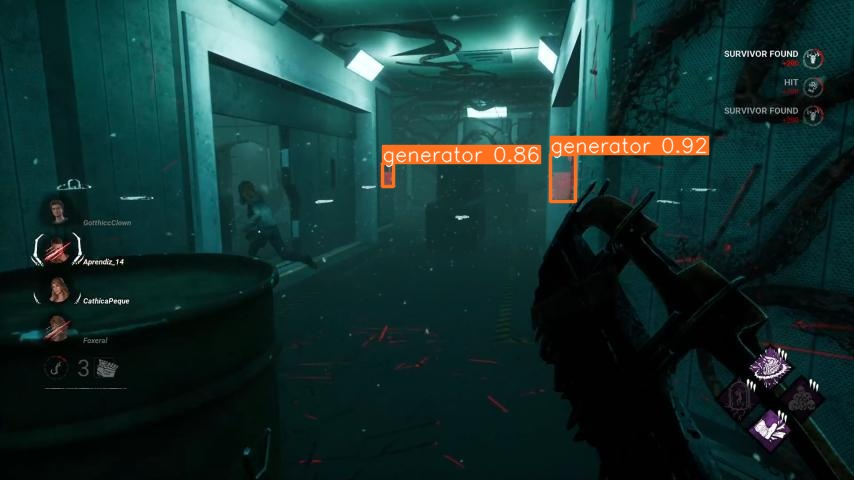

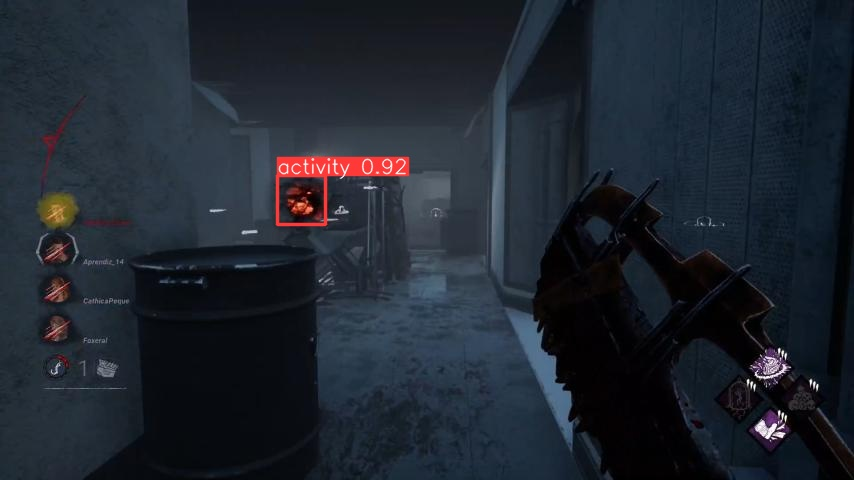

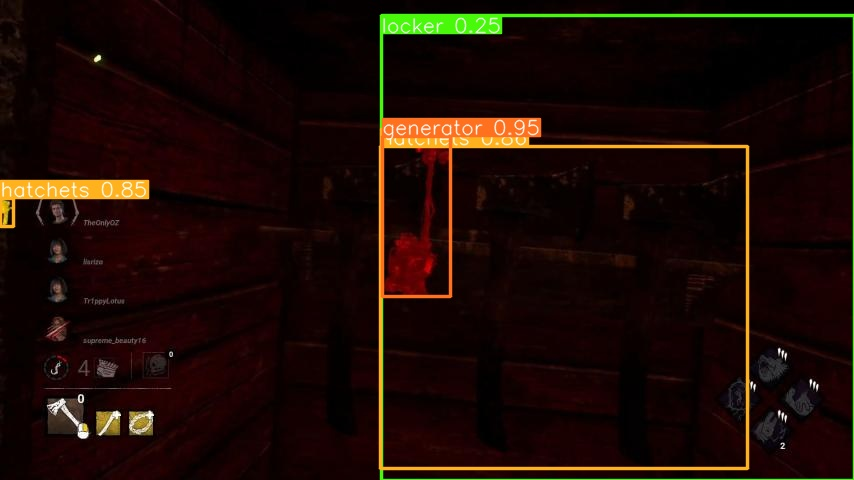

In [25]:
for image_path in glob.glob(f'{HOME}/runs/detect/predict4/*.jpg')[5:12]:
      display(Image(filename=image_path, width=900))
      print("\n")

## Deploy model on Roboflow

Once you have finished training your YOLOv8 model, you’ll have a set of trained weights ready for use. These weights will be in the `/runs/detect/train/weights/best.pt` folder of your project. You can upload your model weights to Roboflow Deploy to use your trained weights on our infinitely scalable infrastructure.

The `.deploy()` function in the [Roboflow pip package](https://docs.roboflow.com/python) now supports uploading YOLOv8 weights.

To upload model weights, add the following code to the “Inference with Custom Model” section in the aforementioned notebook:

In [26]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train30/")

Dependency ultralytics==8.0.196 is required but found version=8.0.227, to fix: `pip install ultralytics==8.0.196`
An error occured when getting the model upload URL: This version already has a trained model. Please generate and train a new version in order to upload model to Roboflow.


In [ ]:
#While your deployment is processing, checkout the deployment docs to take your model to most destinations https://docs.roboflow.com/inference

In [28]:
#Run inference on your model on a persistant, auto-scaling, cloud API

#load model
model = project.version(dataset.version).model

#choose random test set image
import os, random
test_set_loc = dataset.location + "/test/images/"
random_test_image = random.choice(os.listdir(test_set_loc))
print("running inference on " + random_test_image)

pred = model.predict(test_set_loc + random_test_image, confidence=40, overlap=30).json()
pred

running inference on 2023-12-04-21-29-02_mp4-330_jpg.rf.6c31efaeec32c366cbf3f547e3c6287d.jpg


{'predictions': [], 'image': {'width': '854', 'height': '480'}}

# Deploy Your Model to the Edge

In addition to using the Roboflow hosted API for deployment, you can use [Roboflow Inference](https://inference.roboflow.com), an open source inference solution that has powered millions of API calls in production environments. Inference works with CPU and GPU, giving you immediate access to a range of devices, from the NVIDIA Jetson to TRT-compatible devices to ARM CPU devices.

With Roboflow Inference, you can self-host and deploy your model on-device. You can deploy applications using the [Inference Docker containers](https://inference.roboflow.com/quickstart/docker/) or the pip package.

For example, to install Inference on a device with an NVIDIA GPU, we can use:

```
docker pull roboflow/roboflow-inference-server-gpu
```

Then we can run inference via HTTP:

```python
import requests

workspace_id = ""
model_id = ""
image_url = ""
confidence = 0.75
api_key = ""

infer_payload = {
    "image": {
        "type": "url",
        "value": image_url,
    },
    "confidence": confidence,
    "iou_threshold": iou_thresh,
    "api_key": api_key,
}
res = requests.post(
    f"http://localhost:9001/{workspace_id}/{model_id}",
    json=infer_object_detection_payload,
)

predictions = res.json()
```

Above, set your Roboflow workspace ID, model ID, and API key.

- [Find your workspace and model ID](https://docs.roboflow.com/api-reference/workspace-and-project-ids?ref=blog.roboflow.com)
- [Find your API key](https://docs.roboflow.com/api-reference/authentication?ref=blog.roboflow.com#retrieve-an-api-key)

Also, set the URL of an image on which you want to run inference. This can be a local file.

_To use your YOLOv5 model commercially with Inference, you will need a Roboflow Enterprise license, through which you gain a pass-through license for using YOLOv5. An enterprise license also grants you access to features like advanced device management, multi-model containers, auto-batch inference, and more._

## 🏆 Congratulations

### Learning Resources

Roboflow has produced many resources that you may find interesting as you advance your knowledge of computer vision:

- [Roboflow Notebooks](https://github.com/roboflow/notebooks): A repository of over 20 notebooks that walk through how to train custom models with a range of model types, from YOLOv7 to SegFormer.
- [Roboflow YouTube](https://www.youtube.com/c/Roboflow): Our library of videos featuring deep dives into the latest in computer vision, detailed tutorials that accompany our notebooks, and more.
- [Roboflow Discuss](https://discuss.roboflow.com/): Have a question about how to do something on Roboflow? Ask your question on our discussion forum.
- [Roboflow Models](https://roboflow.com): Learn about state-of-the-art models and their performance. Find links and tutorials to guide your learning.

### Convert data formats

Roboflow provides free utilities to convert data between dozens of popular computer vision formats. Check out [Roboflow Formats](https://roboflow.com/formats) to find tutorials on how to convert data between formats in a few clicks.

### Connect computer vision to your project logic

[Roboflow Templates](https://roboflow.com/templates) is a public gallery of code snippets that you can use to connect computer vision to your project logic. Code snippets range from sending emails after inference to measuring object distance between detections.